In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
#setting dimension for plots
sns.set(rc={'figure.figsize':(9,6)})

In [4]:
#read cvs file
cars_data=pd.read_csv('cars_sampled.csv')

In [5]:
#creating copy
cars=cars_data.copy()

In [6]:
#structure of data
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [7]:
#summarizing data
cars.describe()
pd.set_option('display.float_format',lambda x:'%.3f'% x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
#display max set of columnns
pd.set_option('display.max_column',20)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [9]:
#deleting columns
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col,axis=1)

In [10]:
#remove duplicate records
cars.drop_duplicates(keep='first',inplace=True)

In [11]:
#data cleaning
#no.of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [12]:
#variable yearOfRegistration
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()

In [13]:
sum(cars['yearOfRegistration']>2023)

24

In [14]:
sum(cars['yearOfRegistration']<1950)

38

<Axes: xlabel='yearOfRegistration', ylabel='price'>

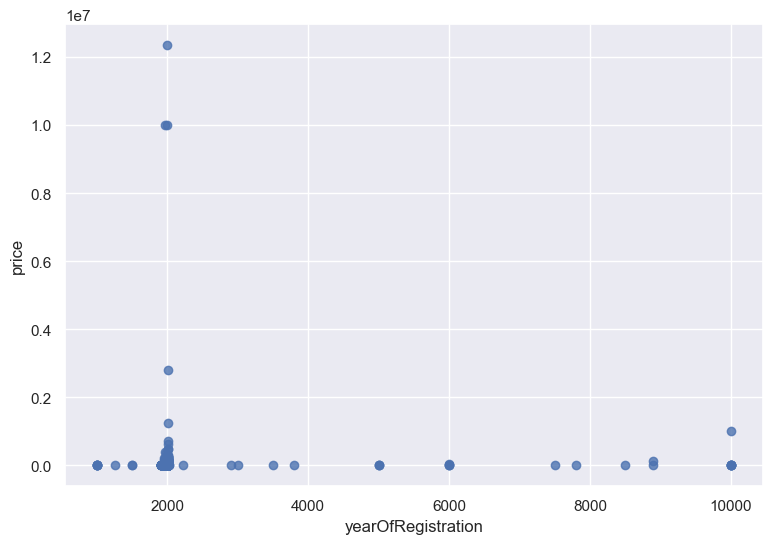

In [15]:
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars)

In [16]:
#variable price
price_count=cars['price'].value_counts().sort_index()

C:\Users\VAISHNAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


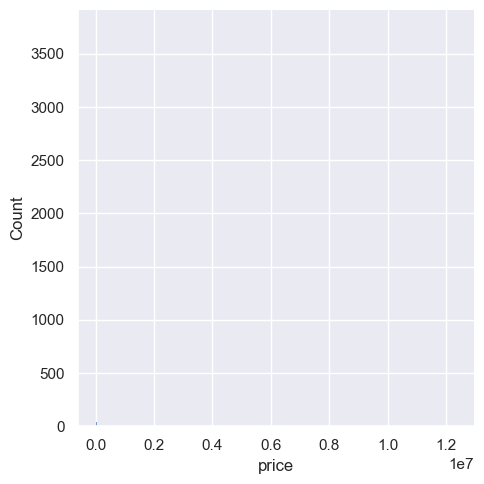

In [17]:
#histogram
sns.displot(cars['price'])

In [18]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<Axes: ylabel='price'>

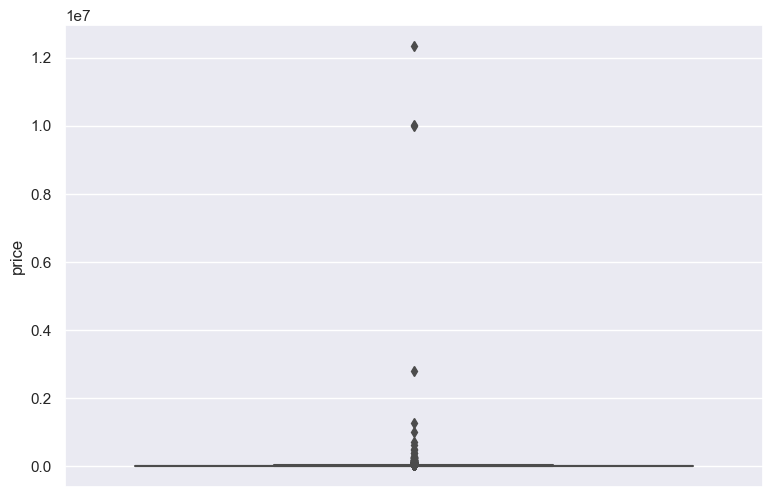

In [19]:
sns.boxplot(y=cars['price'])

In [20]:
sum(cars['price']>150000)

34

In [21]:
sum(cars['price']<100)

1748

In [22]:
#variable powerPS
power_count=cars['powerPS'].value_counts().sort_index()

C:\Users\VAISHNAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


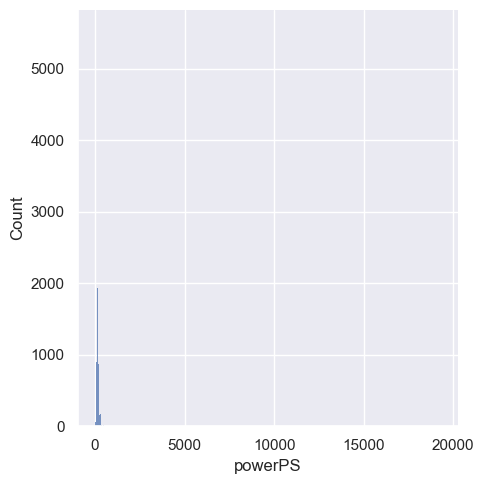

In [23]:
sns.displot(cars['powerPS'])

In [24]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<Axes: ylabel='powerPS'>

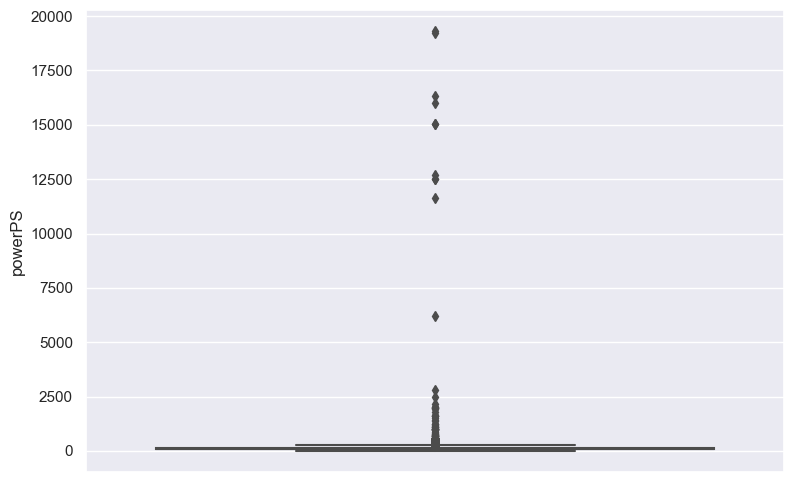

In [25]:
sns.boxplot(y=cars['powerPS'])

<Axes: xlabel='powerPS', ylabel='price'>

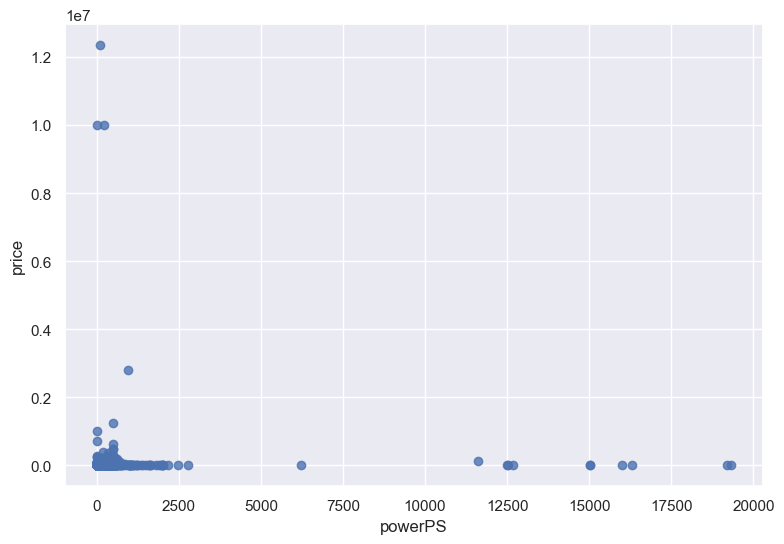

In [26]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

In [27]:
sum(cars['powerPS']>500)

115

In [28]:
sum(cars['powerPS']<10)

5565

In [29]:
cars=cars[
    (cars.yearOfRegistration <= 2023)
    &(cars.yearOfRegistration >= 1950)
    &(cars.price >= 100)
    &(cars.price <= 150000)
    &(cars.powerPS >= 10)
    &(cars.powerPS <= 500)
]

In [30]:
#combining yearOfRegistration and monthOfRegistration
cars['monthOfRegistration']/=12

In [31]:
#create age = yearOfRegistration + monthOfRegstration
cars['Age']=(2023-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       19.873
std         7.093
min         5.000
25%        15.330
50%        19.830
75%        24.170
max        72.750
Name: Age, dtype: float64

C:\Users\VAISHNAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


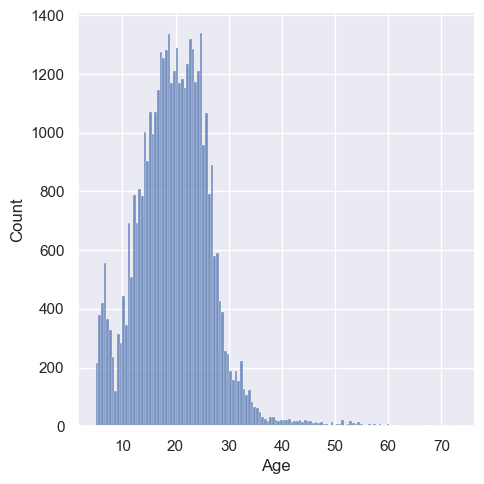

In [32]:
#visualizing parameters
#age
sns.displot(cars['Age'])

<Axes: ylabel='Age'>

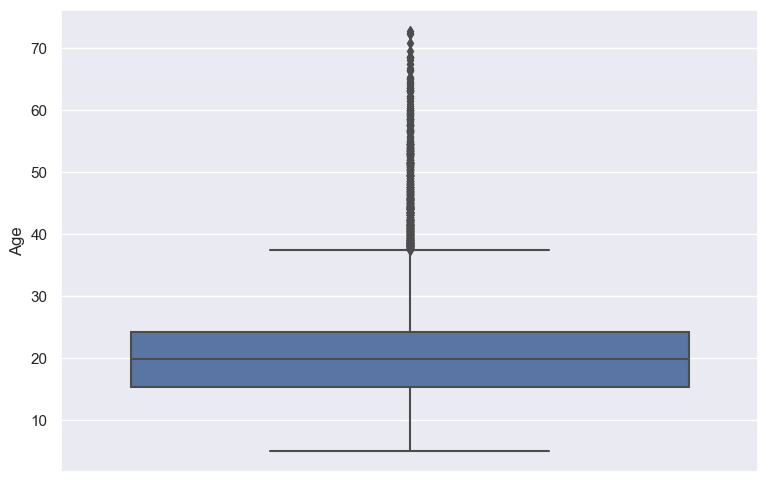

In [33]:
sns.boxplot(y=cars['Age'])

C:\Users\VAISHNAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


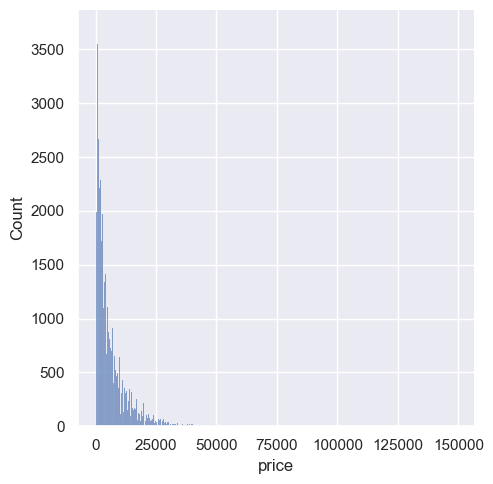

In [34]:
#price
sns.displot(cars['price'])

<Axes: ylabel='price'>

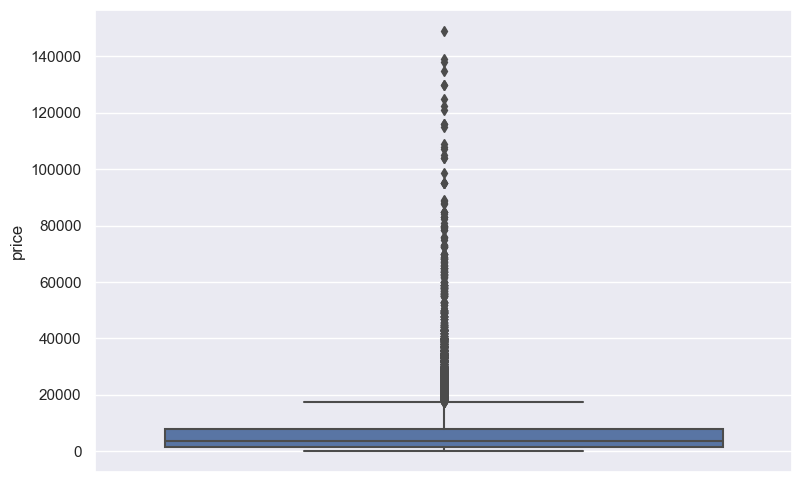

In [35]:
sns.boxplot(y=cars['price'])

C:\Users\VAISHNAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


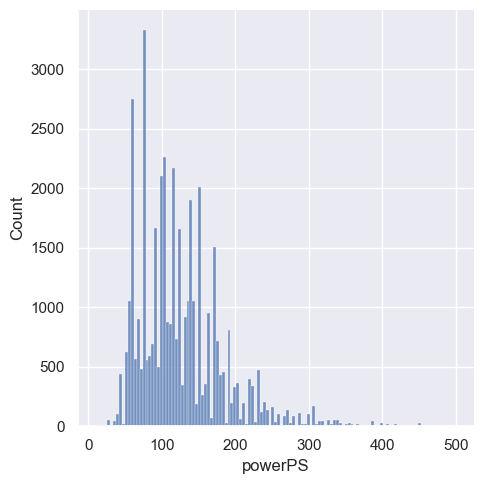

In [36]:
#powerPS
sns.displot(cars['powerPS'])

<Axes: ylabel='powerPS'>

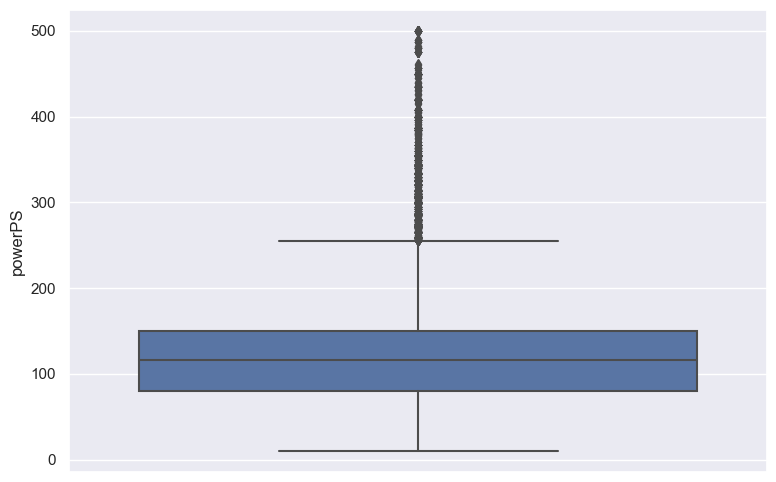

In [37]:
sns.boxplot(y=cars['powerPS'])

<Axes: xlabel='Age', ylabel='price'>

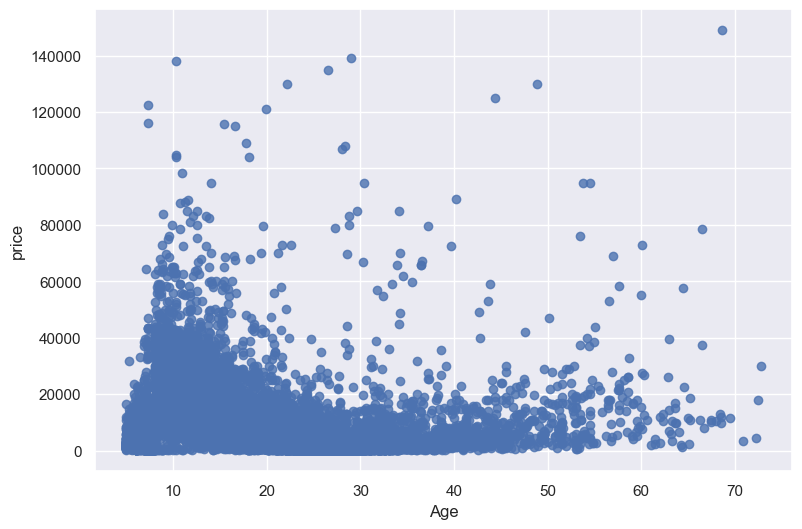

In [38]:
#visualizing parameter after narrowing working
#Age vs price
sns.regplot(x='Age',y='price',scatter=True,fit_reg=False,data=cars)
#with inc in age, price dec

<Axes: xlabel='powerPS', ylabel='price'>

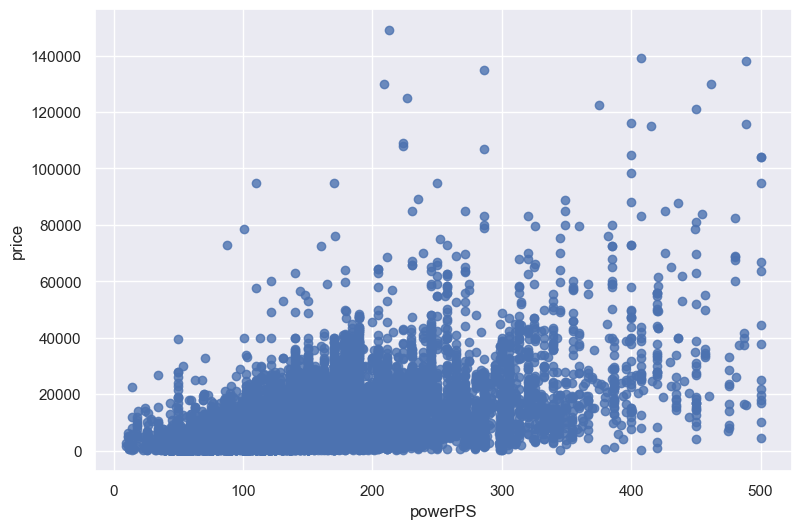

In [39]:
#powerPS vs price
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)


In [40]:
#variable seller
cars['seller'].value_counts()

seller
private       42771
commercial        1
Name: count, dtype: int64

In [41]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


<Axes: xlabel='seller', ylabel='count'>

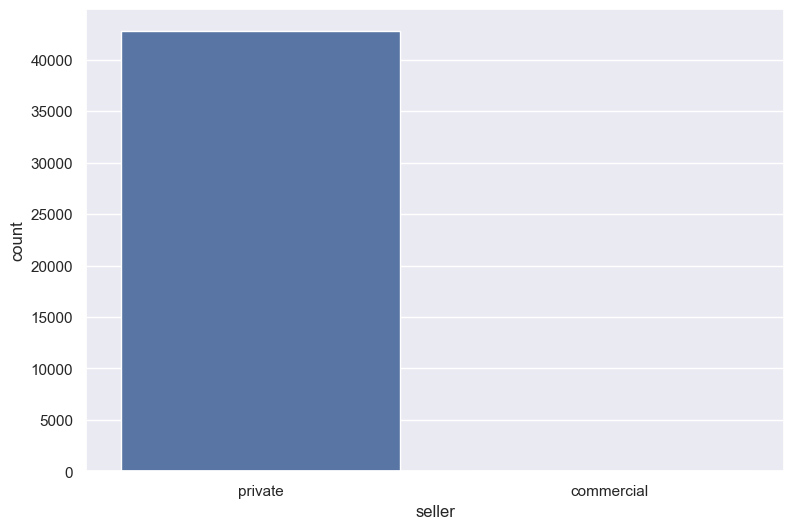

In [42]:
sns.countplot(x='seller',data=cars)

In [43]:
#variable offerType
cars['offerType'].value_counts()

offerType
offer    42772
Name: count, dtype: int64

<Axes: xlabel='offerType', ylabel='count'>

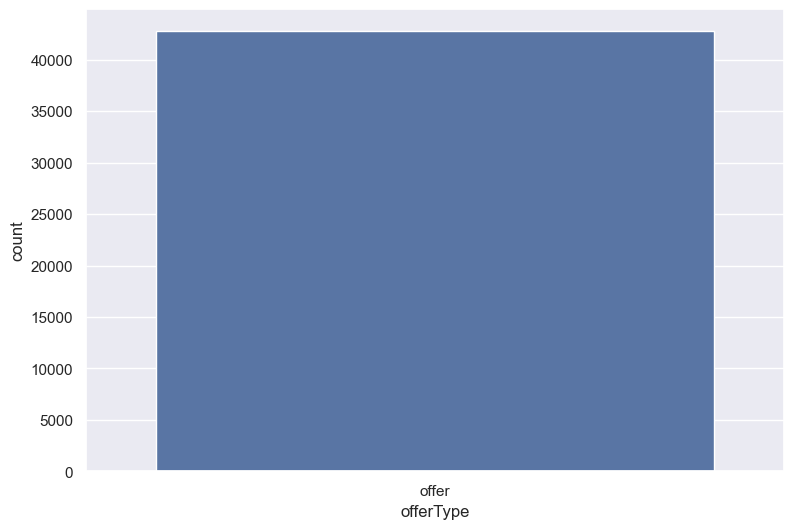

In [44]:
sns.countplot(x='offerType',data=cars)

In [45]:
#variavle abtest
cars['abtest'].value_counts()

abtest
test       22128
control    20644
Name: count, dtype: int64

In [46]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


<Axes: xlabel='abtest', ylabel='count'>

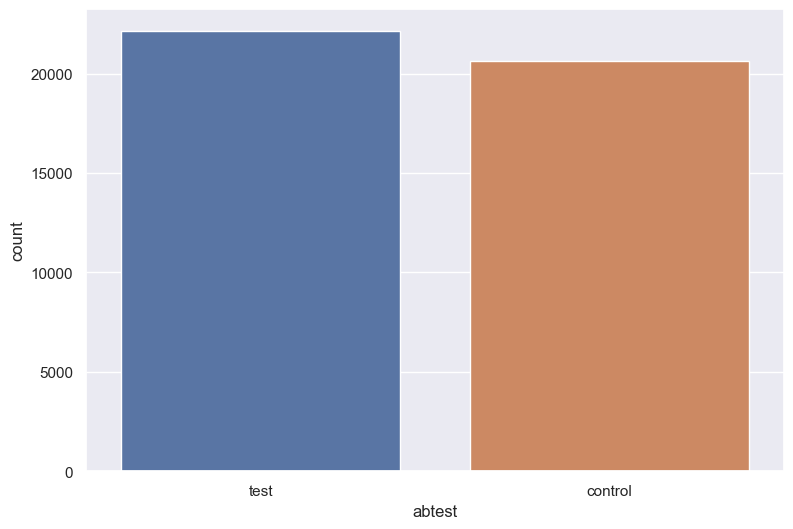

In [47]:
sns.countplot(x='abtest',data=cars)

<Axes: xlabel='abtest', ylabel='price'>

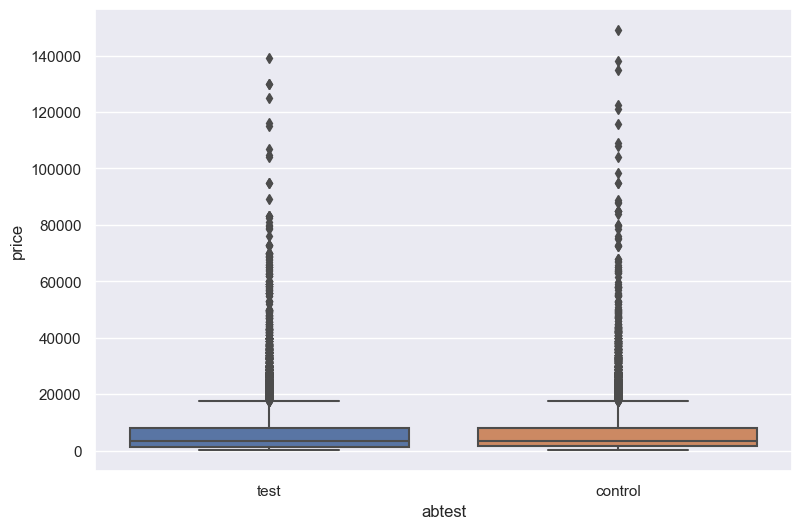

In [48]:
sns.boxplot(x='abtest',y='price',data=cars)

In [49]:
#variable vehicalType
cars['vehicleType'].value_counts()

vehicleType
limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: count, dtype: int64

In [50]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<Axes: xlabel='vehicleType', ylabel='count'>

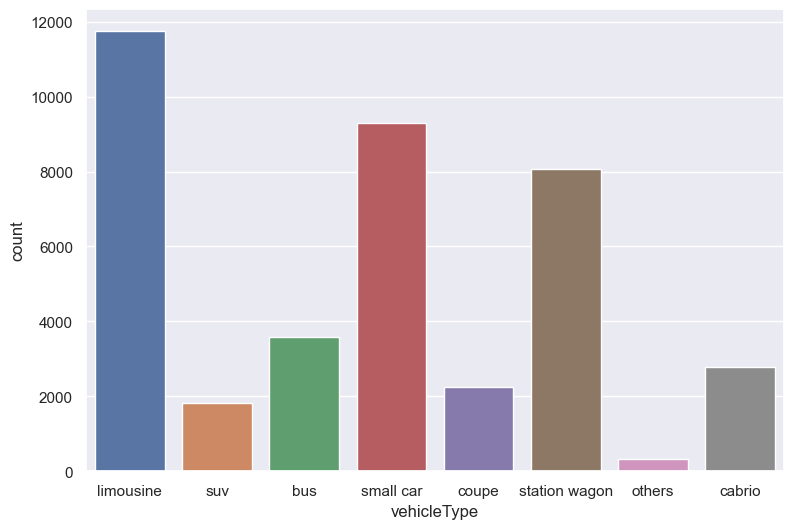

In [51]:
sns.countplot(x='vehicleType',data=cars)

<Axes: xlabel='vehicleType', ylabel='price'>

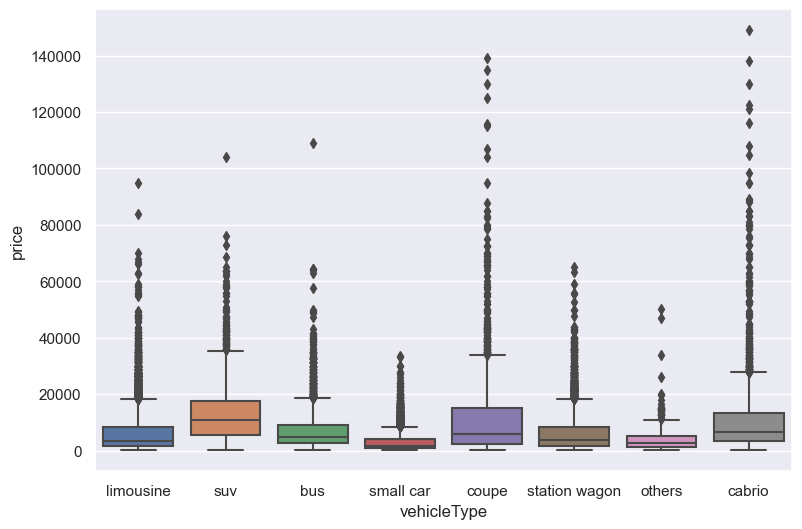

In [52]:
 sns.boxplot(x='vehicleType',y='price',data=cars)

In [53]:
#variable gearbox
cars['gearbox'].value_counts()

gearbox
manual       32582
automatic     9396
Name: count, dtype: int64

In [54]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<Axes: xlabel='gearbox', ylabel='count'>

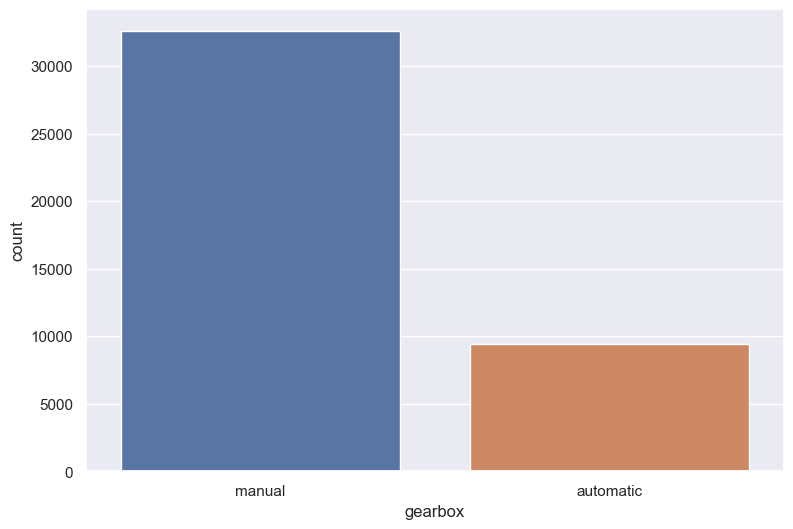

In [55]:
sns.countplot(x='gearbox',data=cars)

<Axes: xlabel='gearbox', ylabel='price'>

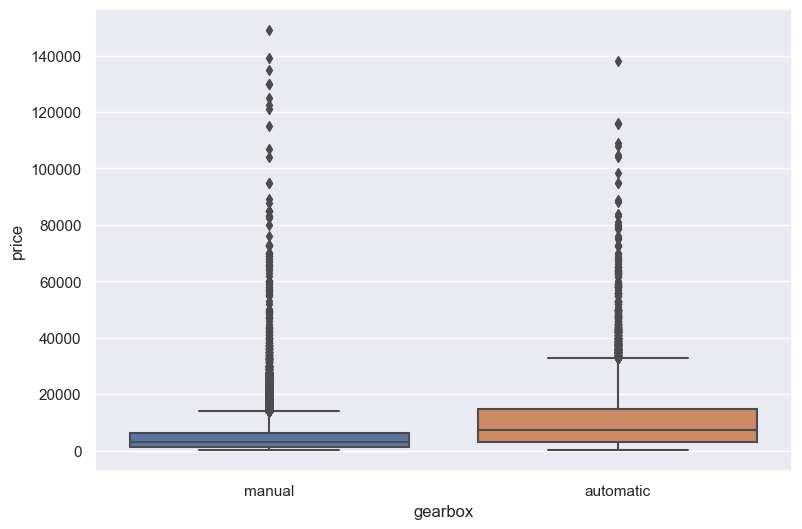

In [56]:
sns.boxplot(x='gearbox',y='price',data=cars)

In [57]:
#variable model
cars['model'].value_counts()

model
golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: count, Length: 247, dtype: int64

In [58]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<Axes: xlabel='gearbox', ylabel='count'>

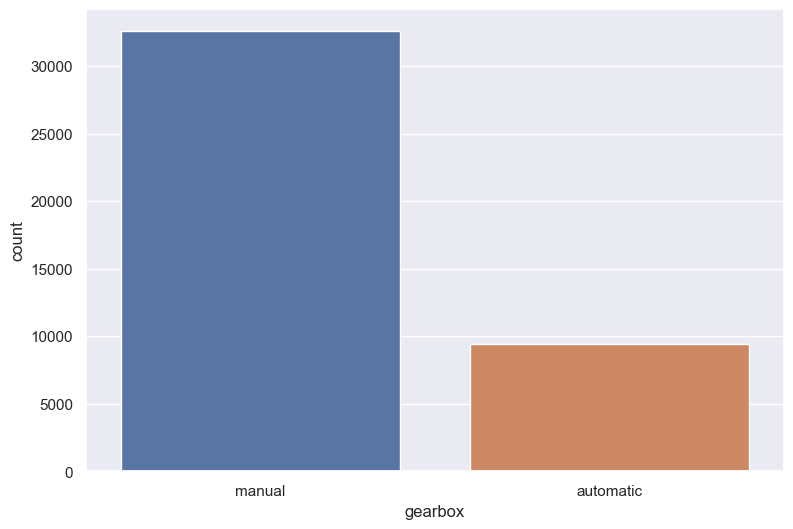

In [59]:
sns.countplot(x='gearbox',data=cars)

<Axes: xlabel='gearbox', ylabel='price'>

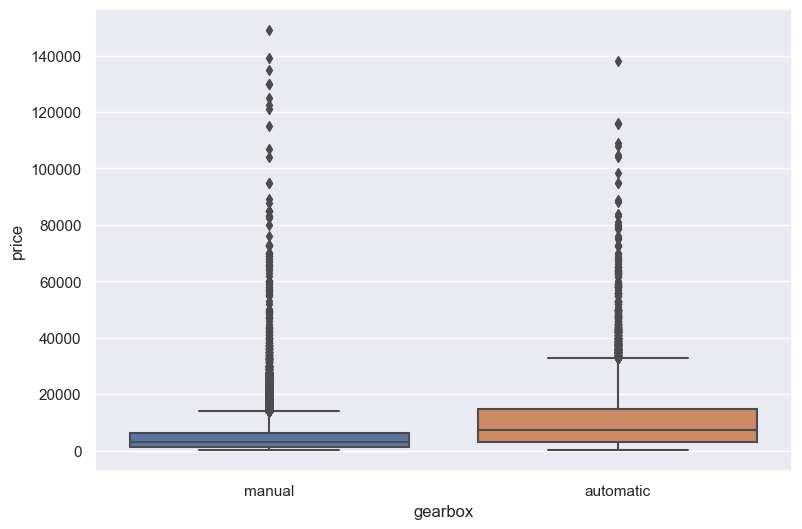

In [60]:
sns.boxplot(x='gearbox',y='price',data=cars)

In [61]:
#variable kilometer
cars['kilometer'].value_counts()

kilometer
150000    27430
125000     4597
100000     1824
90000      1484
80000      1378
70000      1182
60000      1101
50000       932
40000       795
30000       712
20000       651
5000        479
10000       207
Name: count, dtype: int64

In [62]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<Axes: xlabel='kilometer', ylabel='count'>

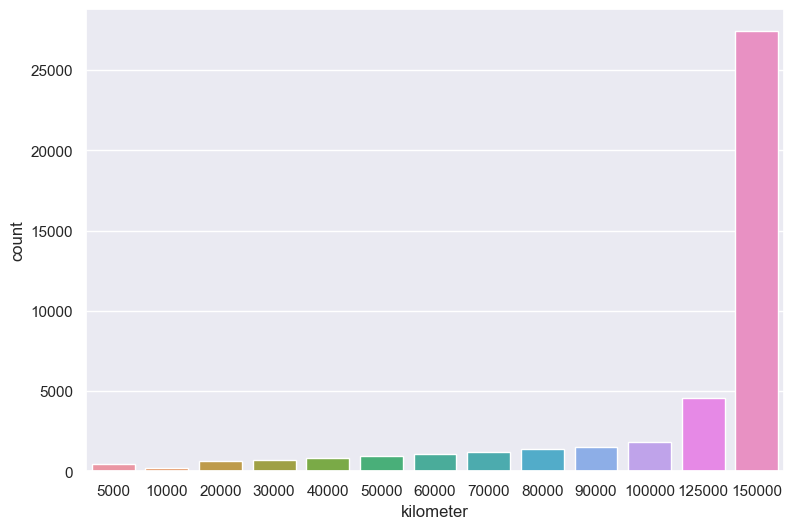

In [63]:
sns.countplot(x='kilometer',data=cars)

<Axes: xlabel='kilometer', ylabel='price'>

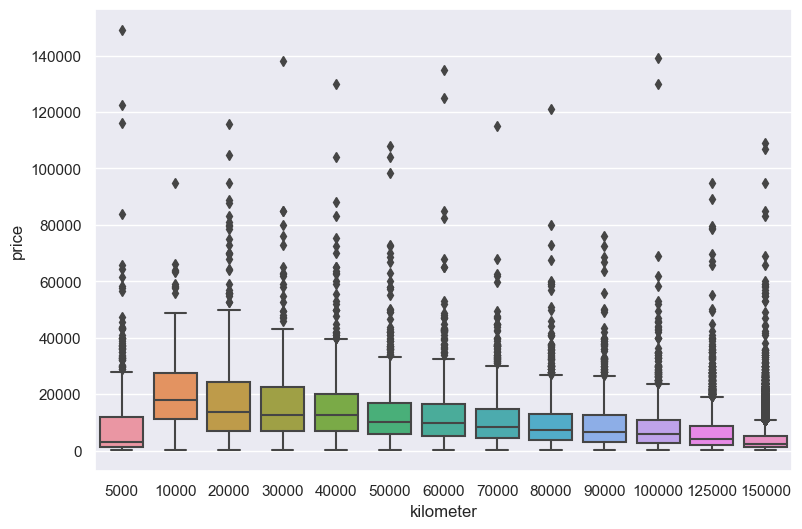

In [64]:
sns.boxplot(x='kilometer',y='price',data=cars)

In [65]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

C:\Users\VAISHNAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


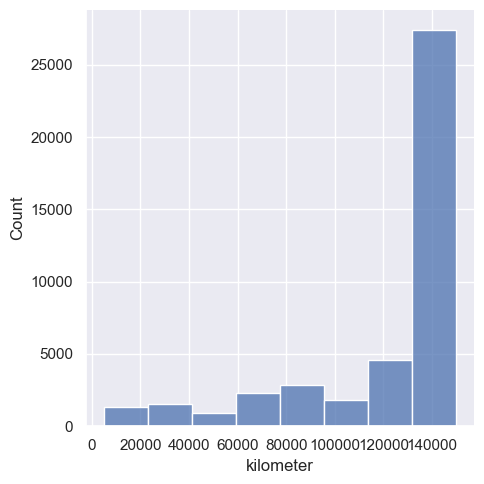

In [66]:
sns.displot(cars['kilometer'],bins=8,kde=False)

In [67]:
#variable fuelType
cars['fuelType'].value_counts()

fuelType
petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: count, dtype: int64

In [68]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<Axes: xlabel='fuelType', ylabel='count'>

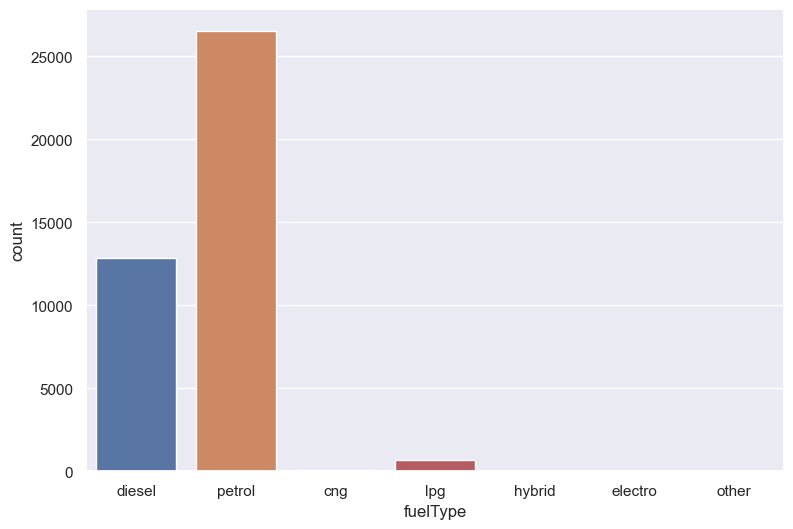

In [69]:
sns.countplot(x='fuelType',data=cars)

<Axes: xlabel='fuelType', ylabel='price'>

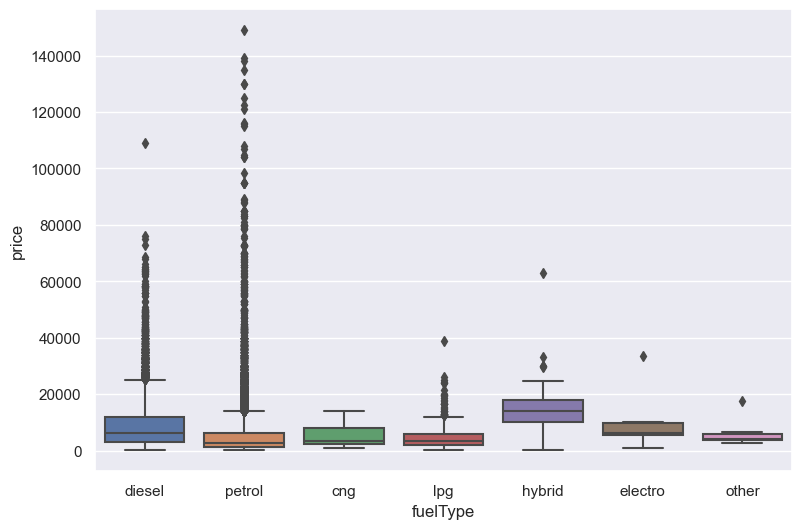

In [70]:
sns.boxplot(x='fuelType',y='price',data=cars)

In [71]:
#variable brand
cars['brand'].value_counts()

brand
volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: count, dtype: int64

In [72]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


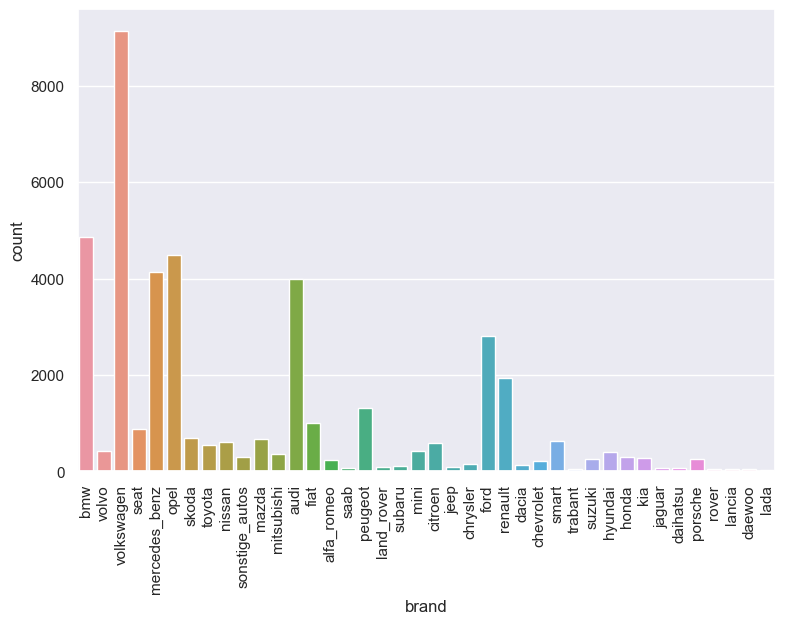

In [73]:
sns.countplot(x='brand',data=cars)
plt.xticks(rotation='vertical')
plt.show()

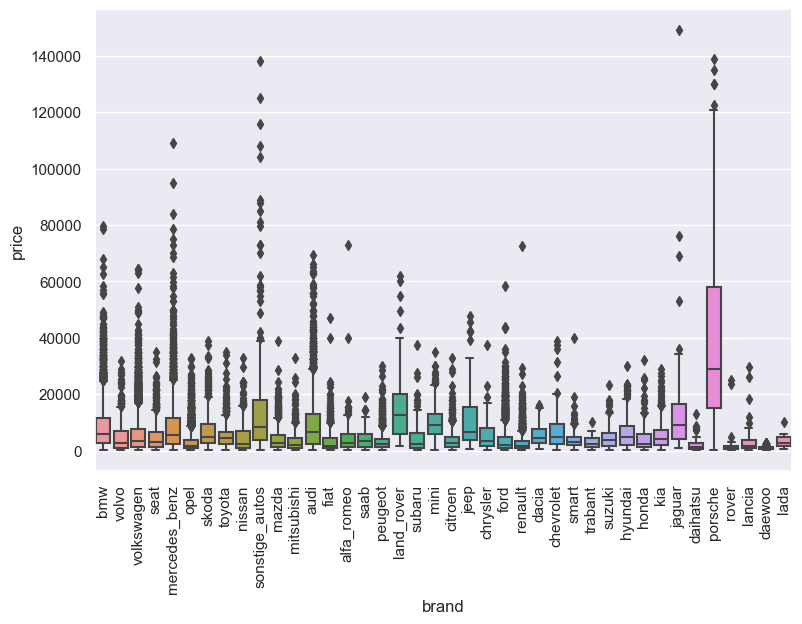

In [74]:
sns.boxplot(x='brand',y='price',data=cars)
plt.xticks(rotation='vertical')
plt.show()

In [75]:
#variable notRepairedDamage
#yes- damaged and not rectified
#no- damaged but rectified
cars['notRepairedDamage'].value_counts()

notRepairedDamage
no     32507
yes     3988
Name: count, dtype: int64

In [76]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<Axes: xlabel='notRepairedDamage', ylabel='count'>

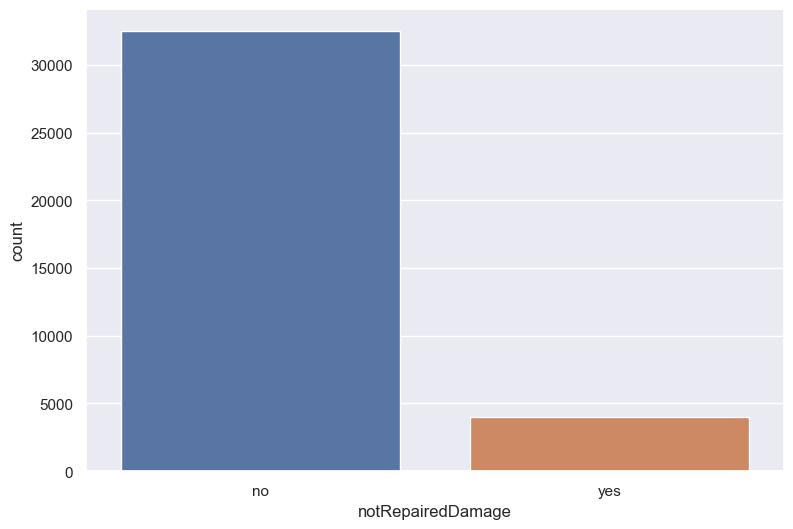

In [77]:
sns.countplot(x='notRepairedDamage',data=cars)

<Axes: xlabel='notRepairedDamage', ylabel='price'>

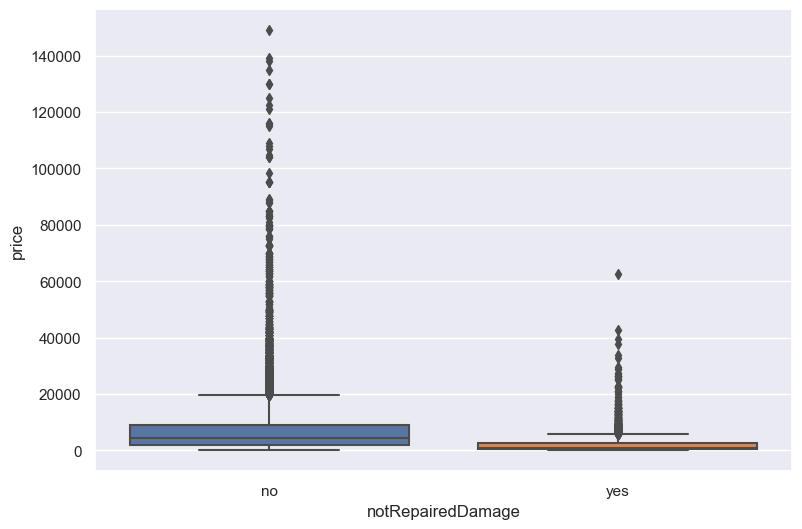

In [78]:
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

In [79]:
#remove insignificat variable
col=['seller','offerType','abtest']
cars=cars.drop(columns=col,axis=1)

In [80]:
cars_copy=cars.copy()

In [81]:
#correlation
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,Age
price,1.000,0.338,0.575,-0.440,0.050,-0.336
yearOfRegistration,0.338,1.000,0.153,-0.293,0.022,-0.999
powerPS,0.575,0.153,1.000,-0.016,0.040,-0.151
kilometer,-0.440,-0.293,-0.016,1.000,-0.019,0.292
monthOfRegistration,0.050,0.022,0.040,-0.019,1.000,0.020
Age,-0.336,-0.999,-0.151,0.292,0.020,1.000


In [82]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS               0.575
kilometer             0.440
yearOfRegistration    0.338
Age                   0.336
monthOfRegistration   0.050
Name: price, dtype: float64

In [83]:
#linear regression and random forest
#data obtained by omitting missing rows
cars_omit=cars.dropna(axis=0)
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [84]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [85]:
#model building with omited values
#separating input and output features
x1=cars_omit.drop(['price'],axis='columns',inplace=False)
y1=cars_omit['price']

array([[<Axes: title={'center': '1. Before'}>,
        <Axes: title={'center': '2. After'}>]], dtype=object)

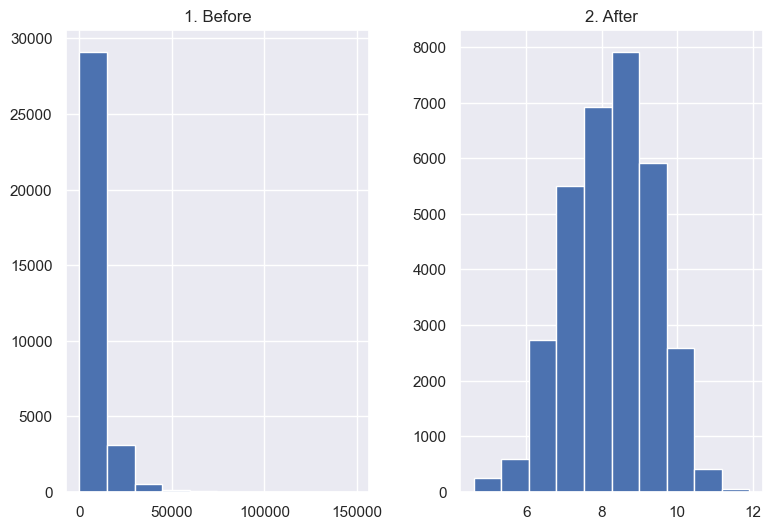

In [86]:
#plotting variable price
prices=pd.DataFrame({"1. Before":y1,"2. After":np.log(y1)})
prices.hist()

In [87]:
#transforming price at logarithmic values
y1=np.log(y1)

In [88]:
#splitting data into test and train
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)

In [89]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(23018, 302) (9866, 302) (23018,) (9866,)


# Baseline model for omitted data

In [90]:
#finding mean for test data value
base_pred=np.mean(y_test)
print(base_pred)

8.249615787653267


In [91]:
#repeating same value till length of test data
base_pred=np.repeat(base_pred,len(y_test))

In [92]:
#finding RMSE
base_root_mean_square_error=np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)

1.1274483657478247


# Linear Regression with omitted data

In [106]:
#setting intercept as true
lgr=LinearRegression(fit_intercept=True)

In [107]:
#model
model_lin1=lgr.fit(x_train,y_train)

In [108]:
#predicting model on test set
cars_predictions_lin1=lgr.predict(x_test)

In [109]:
#computing MSE and RMSE
lin_mse1=mean_squared_error(y_test,cars_predictions_lin1)
lin_rmse1=np.sqrt(lin_mse1)
print(lin_rmse1)

0.5441307172375649


In [110]:
#R squared value
r2_lin_test1=model_lin1.score(x_test,y_test)
r2_lin_train1=model_lin1.score(x_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7670765769569896 0.7809059791496729


count   9866.000
mean       0.003
std        0.544
min       -5.757
25%       -0.257
50%        0.040
75%        0.296
max        4.584
Name: price, dtype: float64

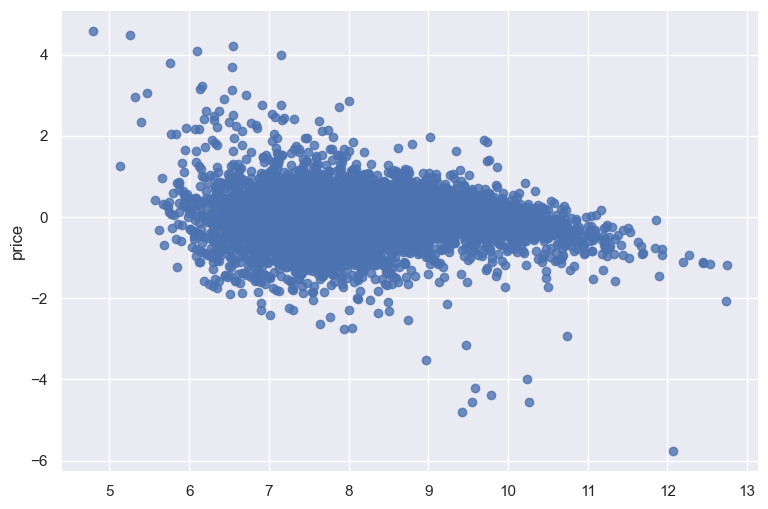

In [111]:
#Regression diagnostics-Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1,y=residuals1,scatter=True,fit_reg=False,data=cars)
residuals1.describe()

# Random Forests with omitted data

In [137]:
# Create and train the random forest model for regression
rf = RandomForestRegressor(max_features='sqrt')
model_rf1 = rf.fit(x_train, y_train)

# Make predictions using the random forest model
cars_predictions_rf1 = rf.predict(x_test)

# Calculate the mean squared error for regression predictions
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)

# Calculate the root mean squared error for regression predictions
rf_rmse1 = np.sqrt(rf_mse1)

print(rf_rmse1)


0.4258230785665708


In [139]:
#R squared value
r2_rf_test1=model_rf1.score(x_test,y_test)
r2_rf_train1=model_rf1.score(x_train,y_train)
print(r2_rf_test1,r2_rf_train1)

0.8573522033108192 0.9786007813153225


# Model building with imputed data

In [140]:
cars_imputed=cars.apply(lambda x:x.fillna(x.median())\
if x.dtype=='float' else\
x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
Age                    0
dtype: int64

In [141]:
#converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [143]:
#separating input and output feature
x2=cars_imputed.drop(['price'],axis='columns',inplace=False)
y2=cars_imputed['price']

array([[<Axes: title={'center': '1.Before'}>,
        <Axes: title={'center': '2.After'}>]], dtype=object)

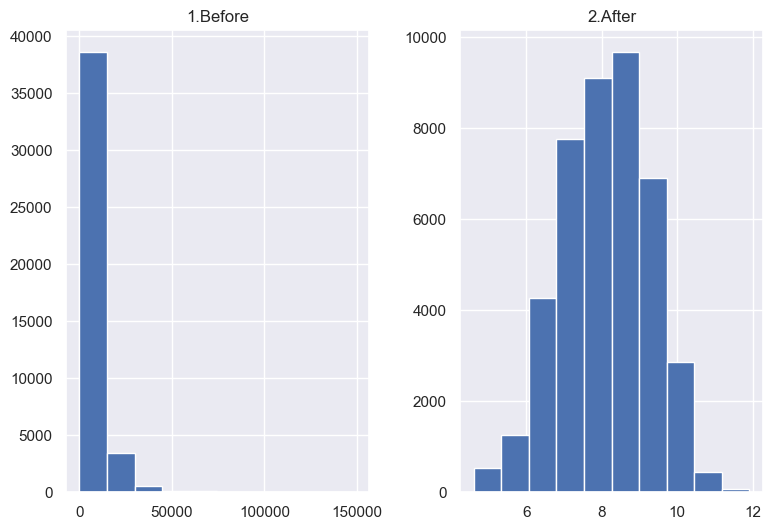

In [144]:
#plotting the variable price
prices=pd.DataFrame({"1.Before":y2,"2.After":np.log(y2)})
prices.hist()

In [145]:
#transforming the price as the logarithmic value
y2=np.log(y2)

In [146]:
#splitting data into train and testx_train1,x_test1,y_train1,y_test1=train_test_split(x2,y2,test_size=0.3,random_state=3)
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(29940, 305) (12832, 305) (29940,) (12832,)


In [147]:
#repeating same value till length of test data
base_pred=np.mean(y_test1)
print(base_pred)

8.068391740519065


In [148]:
#repeating the same value till length of test data
base_pred=np.repeat(base_pred,len(y_test1))

In [149]:
#finding the RMSE
base_root_mean_square_erroe_imputed=np.sqrt(mean_squared_error(y_test1,base_pred))
print(base_root_mean_square_erroe_imputed)

1.1884349112889792


In [150]:
#settting intercept as true
lgr2=LinearRegression(fit_intercept=True)

In [151]:
#model
model_lin2=lgr2.fit(x_train1,y_train1)

In [158]:
#predicting model on test set
cars_predictions_lin2=lgr2.predict(x_test1)

In [159]:
#computing MSE and RMSE
lin_mse2=mean_squared_error(y_test1,cars_predictions_lin2)
lin_rmse2=np.sqrt(lin_mse2)
print(lin_rmse2)

0.6457802770230763


In [160]:
#R squared value
r2_lin_train2=model_lin2.score(x_test1,y_test1)
r2_lin_test2=model_lin2.score(x_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.7090411861041866 0.7047303891046302


# Random Forest with imputed data

In [161]:
#model parameters
rf2=RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)

In [162]:
#model
model_rf2=rf.fit(x_train1,y_train1)

In [163]:
#predicting model on test set
cars_predictions_rf2=rf.predict(x_test1)

In [164]:
#computing MSE and RMSE
rf_mse2=mean_squared_error(y_test1,cars_predictions_rf2)
rf_rmse2=np.sqrt(rf_mse2)
print(rf_rmse2)

0.4810720124110645


In [166]:
r2_rf_test2=model_rf2.score(x_test1,y_test1)
r2_rf_train2=model_rf2.score(x_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

0.8361413468864364 0.9733981512949014


# Fianl output

In [172]:
print('Metrics for models built from data where missing values were omitted')
print('R squared value for train from linear Regrission= %s'%r2_lin_train1)
print('R squared value for test from linear Regrission= %s'%r2_lin_test1)
print('R squared value for train from Random Forest = %s'%r2_lin_train1)
print('R squared value for test from Random Forest= %s'%r2_lin_test1)
print('Base RMSE of model built from data where missing values are omitted=%s'%base_root_mean_square_erroe_imputed) 
print('RMSE value for test from Linear Regression=%s'%lin_rmse1)
print('RMSE value for test from Random Forest=%s'%rf_rmse1)
print('\n\n')
print('Metrics for mpdels built from data where missing values were imputed')
print('R squared value for train from linear Regression= %s'%r2_lin_train2)
print('R squared value for test from linear Regression= %s'%r2_lin_test2)
print('R squared value for train from Random Forests= %s'%r2_rf_train2)
print('R squared value for test from Random Forests= %s'%r2_rf_test2)
print('Base RMSE of model built from data where missing values are imputed=%s'%base_root_mean_square_erroe_imputed) 
print('RMSE value for test from Linear Regression=%s'%lin_rmse2)
print('RMSE value for test from Random Forest=%s'%rf_rmse2)

Metrics for models built from data where missing values were omitted
R squared value for train from linear Regrission= 0.7809059791496729
R squared value for test from linear Regrission= 0.7670765769569896
R squared value for train from Random Forest = 0.7809059791496729
R squared value for test from Random Forest= 0.7670765769569896
Base RMSE of model built from data where missing values are omitted=1.1274483657478247
RMSE value for test from Linear Regression=0.5441307172375649
RMSE value for test from Random Forest=0.4258230785665708



Metrics for mpdels built from data where missing values were imputed
R squared value for train from linear Regression= 0.7047303891046302
R squared value for test from linear Regression= 0.7090411861041866
R squared value for train from Random Forests= 0.9733981512949014
R squared value for test from Random Forests= 0.8361413468864364
Base RMSE of model built from data where missing values are imputed=1.1884349112889792
RMSE value for test from Linea